<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


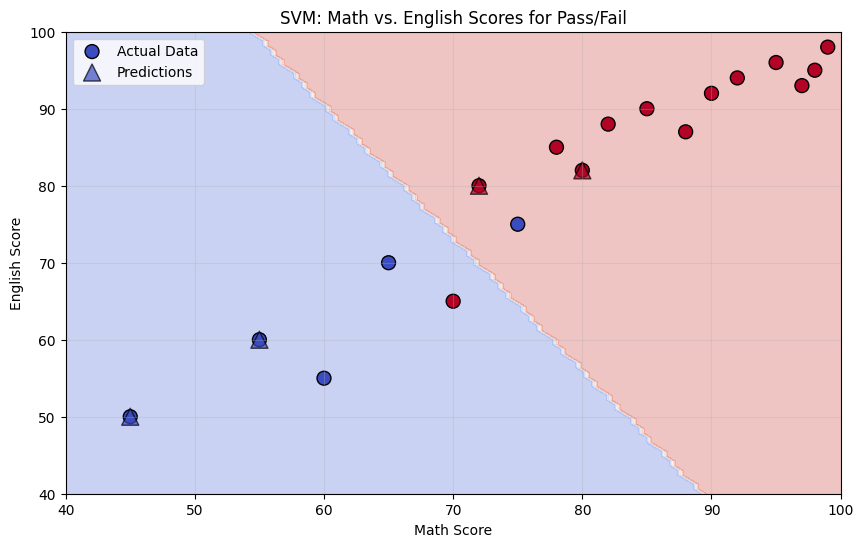


New Student (Math: 82, English: 85)
Predicted Probability of Passing: 0.797
Final Prediction: PASS


In [1]:
# Import necessary libraries
# numpy for numerical operations, matplotlib and seaborn for plotting, sklearn for machine learning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Create a self-made dataset
# Simulate student exam scores (Math, English) vs. Pass/Fail outcomes (binary classification)
# Features: Math score, English score; Label: Pass (1) or Fail (0)
np.random.seed(42)  # For reproducibility
math_scores = np.array([45, 55, 60, 65, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95, 97, 98, 99])
english_scores = np.array([50, 60, 55, 70, 65, 80, 75, 85, 82, 88, 90, 87, 92, 94, 96, 93, 95, 98])
scores = np.column_stack((math_scores, english_scores))  # Combine into 2D feature matrix
pass_fail = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # Labels: Pass (1) or Fail (0)

# Step 2: Split data into training and testing sets
# 80% training, 20% testing to evaluate model performance
x_train, x_test, y_train, y_test = train_test_split(scores, pass_fail, test_size=0.2, random_state=42)

# Step 3: Scale the features
# SVM is sensitive to feature scales, so standardize to mean=0, variance=1
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 4: Create and fit the SVM model
# Use linear kernel for a linear decision boundary; C controls margin softness
model = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
model.fit(x_train_scaled, y_train)  # Train the model on scaled training data

# Step 5: Make predictions
# Predict pass/fail for test data
y_pred = model.predict(x_test_scaled)

# Step 6: Evaluate the model
# Accuracy measures % of correct predictions; confusion matrix shows true vs. predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Step 7: Visualize the data and decision boundary
# Plot decision boundary for 2D feature space (Math vs. English scores)
plt.figure(figsize=(10, 6))
xx, yy = np.meshgrid(np.linspace(40, 100, 100), np.linspace(40, 100, 100))  # Grid for plotting
xy = np.c_[xx.ravel(), yy.ravel()]  # Combine grid points
xy_scaled = scaler.transform(xy)  # Scale grid points
Z = model.predict(xy_scaled).reshape(xx.shape)  # Predict for each grid point
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Plot decision boundary
plt.scatter(scores[:, 0], scores[:, 1], c=pass_fail, s=100, edgecolors='k', cmap='coolwarm', label='Actual Data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=150, marker='^', edgecolors='k', cmap='coolwarm', alpha=0.7, label='Predictions')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('SVM: Math vs. English Scores for Pass/Fail')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 8: Predict for a new student
new_student = np.array([[82, 85]])  # Math: 82, English: 85
new_student_scaled = scaler.transform(new_student)  # Scale the new data
prediction = model.predict(new_student_scaled)
prob_pass = model.predict_proba(new_student_scaled)[:, 1][0]
print(f"\nNew Student (Math: 82, English: 85)")
print(f"Predicted Probability of Passing: {prob_pass:.3f}")
print(f"Final Prediction: {'PASS' if prediction[0] == 1 else 'FAIL'}")

# Explanation of SVM (Support Vector Machine):
# - Finds the optimal hyperplane to separate classes with maximum margin
# - Linear kernel creates a straight line (2D) or plane (higher dimensions)
# - Support vectors: Data points closest to the hyperplane, critical for defining it
# - C parameter: Balances margin size vs. classification error (smaller C = larger margin)
# - Scaling is crucial as SVM is distance-based
# - Use case: Classification with clear margins, robust to outliers